### This is Exploratory Data Analysis for Key Metrics on the Logs

The exploration will follow the following steps:
1. Load test and training dataset and necessary python packages

2. Convert data in the three memory columns into analyzable form

3. Convert "NA" into null value

4. Export a cleaned csv file

** 1. Load dataset and necessary python packages **

In [165]:
# Load python packages
import pandas as pd
import numpy as np

In [166]:
# Load csv file
logs = pd.read_csv('C:/Users/Mengyu/Desktop/study/Auto Desk/log_extraction/Spark_ETL_Loginfo_Key_Metrics_transformed_v3.csv')

** 2. Convert data in the three memory columns to analyzable form **

In [167]:
# Display dataset
logs.head()

,Log File,state_accept_epoch,state_running_time,state_running_epoch,waiting_time_to_run,spark_driver_start_time,spark_driver_start_time_epoch,spark_driver_memory,spark_executor_memory,memoryStore_capacity,job_result,job_successfully_completed_at_time,job_successfully_completed_at_time_epoch,job_failed_at_time,job_failed_at_time_epoch,waiting_time_to_accept,successful_job_completion_time,failed_job_completion_time
0,application_1513303661803_25646_asrd.cp.big.da...,NaN,NA,NA,NA,NA,NA,NA,NA,1983.0MB,NA,NA,NA,NA,NA,NA,NA,NA
1,application_1513303661803_23926_asrd.cp.big.da...,1.513792e+09,17/12/20 17:52:06,1513792326,6,17/12/20 17:51:57,1513792317,12g,6144M,8.4GB,Job completed successfully,17/12/20 17:58:04,1513792684,NA,NA,3,358,NA
2,application_1513303661803_21767_asrd.cp.big.da...,NaN,NA,NA,NA,NA,NA,NA,NA,143.6MB,NA,NA,NA,NA,NA,NA,NA,NA
3,application_1513303661803_24558_asrd.cp.big.da...,1.513814e+09,17/12/21 00:01:41,1513814501,5,17/12/21 00:01:33,1513814493,8G,15G,5.5GB,Job completed successfully,17/12/21 00:21:10,1513815670,NA,NA,3,1169,NA
4,application_1513303661803_24282_asrd.cp.big.da...,1.513797e+09,17/12/20 19:05:06,1513796706,9,17/12/20 19:04:52,1513796692,12G,16G,8.4GB,Job completed successfully,17/12/20 19:14:03,1513797243,NA,NA,5,537,NA


In [168]:
# to check all kinds of formats of Megabyte and Gigabyte
print(logs['spark_driver_memory'].str.extract('(.*\d)(\w*)', expand=True)[1].value_counts())
print(logs['spark_executor_memory'].str.extract('(.*\d)(\w*)', expand=True)[1].value_counts())
print(logs['memoryStore_capacity'].str.extract('(.*\d)(\w*)', expand=True)[1].value_counts())

g    324
G    175
M     44
Name: 1, dtype: int64
G    292
M    251
Name: 1, dtype: int64
GB    875
MB    156
Name: 1, dtype: int64


In [169]:
# Convert all Gigabyte into Megabyte
def GBtoMB(df):
    df = df.copy()
    num = df.str.extract('(.*\d)(\w*)', expand=True)[0]
    unit = df.str.extract('(.*\d)(\w*)', expand=True)[1]
    ifGB = unit.isin(['GB','G','g'])
    df[ifGB] = round(num[ifGB].astype(float)*1024,1)
    ifMB = unit.isin(['MB','M'])
    df[ifMB] = round(num[ifMB].astype(float),1)
    return df

logs['spark_driver_memory'] = GBtoMB(logs['spark_driver_memory']).replace('NA','')
logs['spark_executor_memory'] = GBtoMB(logs['spark_executor_memory'])
logs['memoryStore_capacity'] = GBtoMB(logs['memoryStore_capacity'])

In [170]:
# Rename changed memory columns
name_change = {'spark_driver_memory':'spark_driver_memory_MB', 'spark_executor_memory':'spark_executor_memory_MB', 'memoryStore_capacity':'memoryStore_capacity_MB'}
logs = logs.rename(columns = name_change)

In [171]:
# Display changed memory columns
logs[['spark_driver_memory_MB','spark_executor_memory_MB','memoryStore_capacity_MB']].head()

,spark_driver_memory_MB,spark_executor_memory_MB,memoryStore_capacity_MB
0,NA,NA,1983
1,12288,6144,8601.6
2,NA,NA,143.6
3,8192,15360,5632
4,12288,16384,8601.6


**3. Convert "NA" into null value**

In [172]:
# Display value count of job result
logs['job_result'].value_counts()

 NA                            516
 Job completed successfully    511
 Job failed                     30
Name: job_result, dtype: int64

In [173]:
# convert 'NA' into null value
jobs = logs.replace(' NA', np.nan).copy()
jobs.head()

,Log File,state_accept_epoch,state_running_time,state_running_epoch,waiting_time_to_run,spark_driver_start_time,spark_driver_start_time_epoch,spark_driver_memory_MB,spark_executor_memory_MB,memoryStore_capacity_MB,job_result,job_successfully_completed_at_time,job_successfully_completed_at_time_epoch,job_failed_at_time,job_failed_at_time_epoch,waiting_time_to_accept,successful_job_completion_time,failed_job_completion_time
0,application_1513303661803_25646_asrd.cp.big.da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,application_1513303661803_23926_asrd.cp.big.da...,1.513792e+09,17/12/20 17:52:06,1513792326,6,17/12/20 17:51:57,1513792317,12288.0,6144.0,8601.6,Job completed successfully,17/12/20 17:58:04,1513792684,NaN,NaN,3,358,NaN
2,application_1513303661803_21767_asrd.cp.big.da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,application_1513303661803_24558_asrd.cp.big.da...,1.513814e+09,17/12/21 00:01:41,1513814501,5,17/12/21 00:01:33,1513814493,8192.0,15360.0,5632.0,Job completed successfully,17/12/21 00:21:10,1513815670,NaN,NaN,3,1169,NaN
4,application_1513303661803_24282_asrd.cp.big.da...,1.513797e+09,17/12/20 19:05:06,1513796706,9,17/12/20 19:04:52,1513796692,12288.0,16384.0,8601.6,Job completed successfully,17/12/20 19:14:03,1513797243,NaN,NaN,5,537,NaN


In [174]:
# Display info of jobs
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 18 columns):
Log File                                    1057 non-null object
state_accept_epoch                          539 non-null float64
state_running_time                          538 non-null object
state_running_epoch                         538 non-null object
waiting_time_to_run                         538 non-null object
spark_driver_start_time                     543 non-null object
spark_driver_start_time_epoch               543 non-null object
spark_driver_memory_MB                      543 non-null float64
spark_executor_memory_MB                    543 non-null float64
memoryStore_capacity_MB                     1031 non-null float64
job_result                                  541 non-null object
job_successfully_completed_at_time          511 non-null object
job_successfully_completed_at_time_epoch    511 non-null object
job_failed_at_time                          30 non-null

In [175]:
#convert epoch seconds to timestamp format
import datetime
for i in ['state_accept_epoch','state_running_epoch','spark_driver_start_time_epoch','job_successfully_completed_at_time_epoch','job_failed_at_time_epoch']:
    p = i.replace("epoch","datetime")
    jobs[p] = pd.to_datetime(jobs[i].astype('float'),unit="s")

In [176]:
list(jobs.columns.values)


['Log File',
 'state_accept_epoch',
 'state_running_time',
 'state_running_epoch',
 'waiting_time_to_run',
 'spark_driver_start_time',
 'spark_driver_start_time_epoch',
 'spark_driver_memory_MB',
 'spark_executor_memory_MB',
 'memoryStore_capacity_MB',
 'job_result',
 'job_successfully_completed_at_time',
 'job_successfully_completed_at_time_epoch',
 'job_failed_at_time',
 'job_failed_at_time_epoch',
 'waiting_time_to_accept',
 'successful_job_completion_time',
 'failed_job_completion_time',
 'state_accept_datetime',
 'state_running_datetime',
 'spark_driver_start_time_datetime',
 'job_successfully_completed_at_time_datetime',
 'job_failed_at_time_datetime']

In [177]:
# arrange the order of columns
jobs = jobs[['Log File',
 'state_accept_datetime',
 'state_accept_epoch',
 'state_running_datetime',
 'state_running_epoch',
 'waiting_time_to_run',
 'spark_driver_start_time_datetime',
 'spark_driver_start_time_epoch',
 'spark_driver_memory_MB',
 'spark_executor_memory_MB',
 'memoryStore_capacity_MB',
 'job_result',
 'job_successfully_completed_at_time_datetime',
 'job_successfully_completed_at_time_epoch',
 'job_failed_at_time_datetime',
 'job_failed_at_time_epoch',
 'waiting_time_to_accept',
 'successful_job_completion_time',
 'failed_job_completion_time'
 ]]

In [178]:
# final check
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

jobs.head()
jobs.info()

,Log File,state_accept_datetime,state_accept_epoch,state_running_datetime,state_running_epoch,waiting_time_to_run,spark_driver_start_time_datetime,spark_driver_start_time_epoch,spark_driver_memory_MB,spark_executor_memory_MB,memoryStore_capacity_MB,job_result,job_successfully_completed_at_time_datetime,job_successfully_completed_at_time_epoch,job_failed_at_time_datetime,job_failed_at_time_epoch,waiting_time_to_accept,successful_job_completion_time,failed_job_completion_time
0,application_1513303661803_25646_asrd.cp.big.da...,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,1983.0,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
1,application_1513303661803_23926_asrd.cp.big.da...,2017-12-20 17:52:00,1.513792e+09,2017-12-20 17:52:06,1513792326,6,2017-12-20 17:51:57,1513792317,12288.0,6144.0,8601.6,Job completed successfully,2017-12-20 17:58:04,1513792684,NaT,NaN,3,358,NaN
2,application_1513303661803_21767_asrd.cp.big.da...,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,143.6,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
3,application_1513303661803_24558_asrd.cp.big.da...,2017-12-21 00:01:36,1.513814e+09,2017-12-21 00:01:41,1513814501,5,2017-12-21 00:01:33,1513814493,8192.0,15360.0,5632.0,Job completed successfully,2017-12-21 00:21:10,1513815670,NaT,NaN,3,1169,NaN
4,application_1513303661803_24282_asrd.cp.big.da...,2017-12-20 19:04:57,1.513797e+09,2017-12-20 19:05:06,1513796706,9,2017-12-20 19:04:52,1513796692,12288.0,16384.0,8601.6,Job completed successfully,2017-12-20 19:14:03,1513797243,NaT,NaN,5,537,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 19 columns):
Log File                                       1057 non-null object
state_accept_datetime                          539 non-null datetime64[ns]
state_accept_epoch                             539 non-null float64
state_running_datetime                         538 non-null datetime64[ns]
state_running_epoch                            538 non-null object
waiting_time_to_run                            538 non-null object
spark_driver_start_time_datetime               543 non-null datetime64[ns]
spark_driver_start_time_epoch                  543 non-null object
spark_driver_memory_MB                         543 non-null float64
spark_executor_memory_MB                       543 non-null float64
memoryStore_capacity_MB                        1031 non-null float64
job_result                                     541 non-null object
job_successfully_completed_at_time_datetime    511 non-null

**4. Export a cleaned csv file**

In [179]:
jobs.to_csv('C:/Users/Mengyu/Desktop/study/Auto Desk/log_extraction/Clean_Key_Metrics_v4.csv')

In [ ]:
for i in []

TypeError: '<=' not supported between instances of 'float' and 'str'

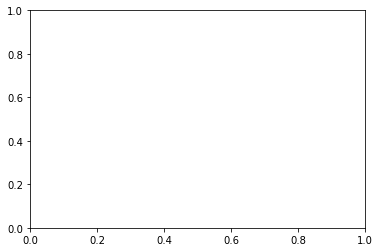

In [181]:
#EDA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x1 = jobs["successful_job_completion_time"]
x2 = jobs["waiting_time_to_accept"]
x3 = jobs["waiting_time_to_run"]

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);